***HR ANALYTICS***

In this project we will implement Random forest classifiers and understand reason behind  employee attrition . This analysis will help the HR to know the reasons behind employees leaving the firm.

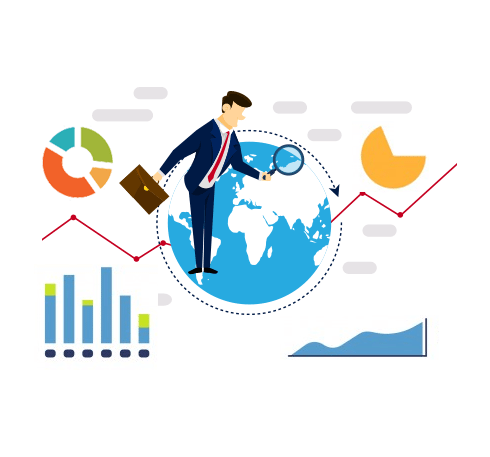

**Importing libraries for our project**

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

**Loading and Reading datasets**

In [ ]:
uploaded = files.upload()
 
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition.csv']))

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
#descibing statstical things
df.describe()


,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.607483,443.074830,1.260544,8.192517,1.912925,2.247619,0.0,734.500000,1.721769,0.600000,35.891156,1.729932,4.458503,1.728571,1.097279,655.029252,709.248980,2.693197,0.0,0.282993,4.209524,0.153741,1.712245,0.0,0.793878,11.278231,2.799320,1.761224,6.991156,4.229252,2.187755,4.123129,0.161224
std,0.665455,253.513199,0.527792,8.106864,1.024165,1.331369,0.0,424.496761,1.093082,0.490065,20.329428,0.711561,2.461821,1.102846,0.730121,388.751420,411.827139,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.775842,1.289271,0.706476,6.053027,3.623137,3.222430,3.568136,0.367863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,225.000000,1.000000,1.000000,1.000000,1.000000,0.0,367.250000,1.000000,0.000000,18.000000,1.000000,2.000000,1.000000,1.000000,314.000000,353.250000,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,6.000000,2.000000,1.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,2.000000,447.000000,1.000000,6.000000,2.000000,2.000000,0.0,734.500000,2.000000,1.000000,36.000000,2.000000,5.000000,2.000000,1.000000,651.500000,706.500000,2.000000,0.0,0.000000,3.000000,0.000000,2.000000,0.0,1.000000,10.000000,3.000000,2.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,2.000000,660.000000,2.000000,13.000000,3.000000,3.000000,0.0,1101.750000,3.000000,1.000000,53.750000,2.000000,7.000000,3.000000,2.000000,986.750000,1065.750000,4.000000,0.0,1.000000,7.000000,0.000000,3.000000,0.0,1.000000,15.000000,3.000000,2.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,2.000000,885.000000,2.000000,28.000000,4.000000,5.000000,0.0,1469.000000,3.000000,1.000000,70.000000,3.000000,8.000000,3.000000,2.000000,1348.000000,1426.000000,9.000000,0.0,1.000000,14.000000,1.000000,3.000000,0.0,3.000000,39.000000,6.000000,3.000000,36.000000,18.000000,15.000000,17.000000,1.000000


In [ ]:
#Checking for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No null values so we can proceed further

**Data Visualization**

In [ ]:
attrition_count = pd.DataFrame(df['Attrition'].value_counts())
attrition_count

,Attrition
No,1233
Yes,237


([<matplotlib.patches.Wedge at 0x7fc7f1472e10>,
 [Text(-1.136781068348268, 0.6306574368426737, 'No'),
  Text(0.961891673217765, -0.5336332157899548, 'Yes')])

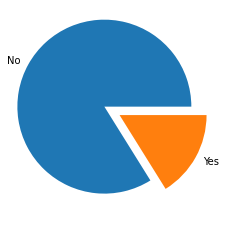

In [ ]:
plt.pie(attrition_count['Attrition'] , labels = ['No' , 'Yes'] , explode = (0.2,0))

In [ ]:
df.drop(['EmployeeCount' , 'EmployeeNumber'] , axis = 1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
attrition_dummies = pd.get_dummies(df['Attrition'])
attrition_dummies.head(10)

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [ ]:
df = pd.concat([df, attrition_dummies] , axis = 1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,1,0


In [ ]:
df = df.drop(['Attrition' , 'No'] , axis = 1)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


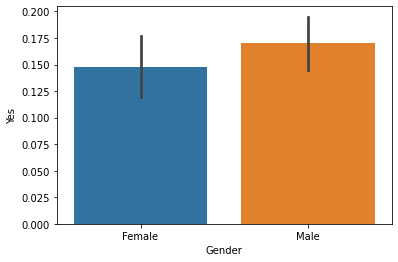

In [ ]:
sns.barplot(x = 'Gender' , y = 'Yes', data = df)

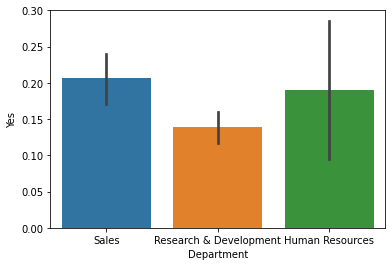

In [ ]:
sns.barplot(x = 'Department', y = 'Yes', data = df)

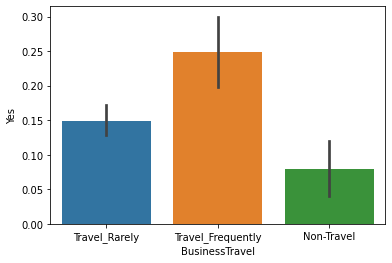

In [ ]:
sns.barplot(x = 'BusinessTravel', y = 'Yes', data = df)

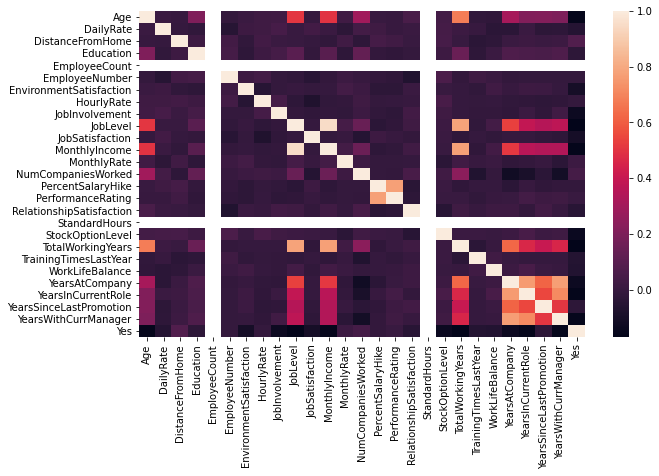

In [ ]:
#corelation map
plt.figure(figsize = (10,6))
sns.heatmap(df.corr())

In [ ]:
df = df.drop(['Age' , 'JobLevel'], axis = 1)
#age and job level is not required for further analysis ,so we dropped it

**Data Preprocessing**

In [ ]:

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


**Model Building**

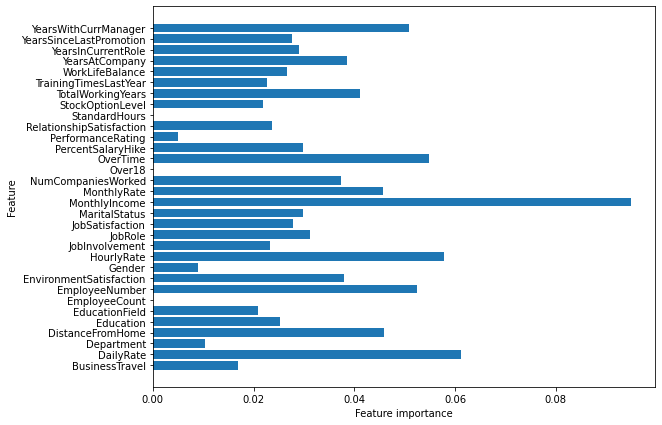

In [ ]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), rf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#We are going to use random forest classifer 
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [ ]:
x  = df.drop(['Yes'], axis = 1)
y = df['Yes']

In [ ]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [ ]:
x_train.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
338,2,295,2,4,2,2,0,338,3,0,0,1,7,2,0,816,194,1,0,0,2,0,2,0,3,10,2,2,10,9,1,2
363,2,159,2,4,2,2,0,363,3,0,4,2,8,2,2,298,416,1,0,1,2,0,1,0,0,1,2,2,1,0,0,0
759,2,437,0,23,3,3,0,759,1,1,6,2,1,1,2,88,365,1,0,0,5,0,0,0,0,6,3,2,6,3,0,4
793,2,502,1,14,1,1,0,793,0,1,20,2,2,2,0,94,1183,1,0,0,5,0,3,0,1,4,5,1,4,2,2,2
581,2,516,1,0,2,1,0,581,3,1,8,0,2,2,1,449,1298,3,0,0,10,1,2,0,2,7,2,2,2,2,0,2


In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rf.score(x_train, y_train)

0.9815354713313897

**Predicting for x_test**

In [ ]:
pred = rf.predict(x_test)

In [ ]:
accuracy_score(y_test, pred)

0.8526077097505669

**Our Accuracy for Tested Data = 85.26 %**